In [1]:
# horse-colic dataset with KNNImputer following 
# https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
# This dataset has 30% missing values. There are 300 rows and 26 input variables with one output variable.
# It is a binary classification prediction task that involves predicting 1 if the horse lived and 2 if the horse died due to the colic.

import pandas as pd

#df=pd.read_csv('horse-colic.csv',header=None, na_values='?') # replacing missing values with '?'
df=pd.read_csv('horse-colic.csv',header=None, na_values='?') # replacing missing values with '?'
print(df.shape)
print(df.head(5))


(300, 28)
    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [7]:
for i in range(df.shape[1]):
    miss_val = df[[i]].isnull().sum()
    perc = (miss_val / df.shape[0]) * 100
    print('>%d, Missing:%d (%.2f%%)'% (i,miss_val,perc))


>0, Missing:1 (0.33%)
>1, Missing:0 (0.00%)
>2, Missing:0 (0.00%)
>3, Missing:60 (20.00%)
>4, Missing:24 (8.00%)
>5, Missing:58 (19.33%)
>6, Missing:56 (18.67%)
>7, Missing:69 (23.00%)
>8, Missing:47 (15.67%)
>9, Missing:32 (10.67%)
>10, Missing:55 (18.33%)
>11, Missing:44 (14.67%)
>12, Missing:56 (18.67%)
>13, Missing:104 (34.67%)
>14, Missing:106 (35.33%)
>15, Missing:247 (82.33%)
>16, Missing:102 (34.00%)
>17, Missing:118 (39.33%)
>18, Missing:29 (9.67%)
>19, Missing:33 (11.00%)
>20, Missing:165 (55.00%)
>21, Missing:198 (66.00%)
>22, Missing:1 (0.33%)
>23, Missing:0 (0.00%)
>24, Missing:0 (0.00%)
>25, Missing:0 (0.00%)
>26, Missing:0 (0.00%)
>27, Missing:0 (0.00%)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       240 non-null    float64
 4   4       276 non-null    float64
 5   5       242 non-null    float64
 6   6       244 non-null    float64
 7   7       231 non-null    float64
 8   8       253 non-null    float64
 9   9       268 non-null    float64
 10  10      245 non-null    float64
 11  11      256 non-null    float64
 12  12      244 non-null    float64
 13  13      196 non-null    float64
 14  14      194 non-null    float64
 15  15      53 non-null     float64
 16  16      198 non-null    float64
 17  17      182 non-null    float64
 18  18      271 non-null    float64
 19  19      267 non-null    float64
 20  20      135 non-null    float64
 21  21      102 non-null    float64
 22  22

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import isnan
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
import sklearn.metrics as metrics


In [39]:
# X, y_train
idx = [i for i in range(df.shape[1]) if i!=23]   # because 23rd col can be used for target/label
data=df.values
X, y = data[:,idx], data[:,23]
print(X.shape)
print(y.shape)
                      

(300, 27)
(300,)


In [17]:
df[23].value_counts() # target distributioin is balance

1    191
2    109
Name: 23, dtype: int64

In [15]:
# KNNImpute
print("Before KNNIMpute missing: %d" %sum(isnan(X).flatten()))
knnImpute=KNNImputer()
knnImpute.fit(X)
Xtrans = knnImpute.transform(X)
print("After KNNIMpute missing: %d" %sum(isnan(Xtrans).flatten()))


Before KNNIMpute missing: 1605
After KNNIMpute missing: 0


In [29]:
# serialized EDA performed dataframe 
myCols=[]
for i in df.columns:
    if i!=23:
        myCols.append(i)

# re-build dataframe to serialized
ser_df = pd.DataFrame(Xtrans, columns=myCols)
print(ser_df.shape)
ser_df.to_json('imputed_horse_colic.json')
!ls -lhtr imputed_horse_colic.json

(300, 27)
-rw-rw-r-- 1 jmajumde jmajumde 81K Oct 21 15:54 imputed_horse_colic.json


In [40]:
# read the EDA performed serialized json and convert to pandas df
imputed_df = pd.read_json('imputed_horse_colic.json')
imputed_df.head()

0   1        2     3      4     5    6    7    8    9   ...   17    18  \
0   2   1   530101  38.5   66.0  28.0  3.0  3.0  2.2  2.0  ...  5.0  45.0   
1   1   1   534817  39.2   88.0  20.0  3.0  2.0  4.0  1.0  ...  2.0  50.0   
2   2   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  1.0  33.0   
3   1   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  3.2  48.0   
4   2   1   530255  37.3  104.0  35.0  3.0  2.6  6.0  2.0  ...  4.2  74.0   

     19   20    21   22     24  25  26  27  
0   8.4  2.2  3.96  2.0  11300   0   0   2  
1  85.0  2.0  2.00  3.0   2208   0   0   2  
2   6.7  2.2  5.18  1.0      0   0   0   1  
3   7.2  3.0  5.30  2.0   2208   0   0   1  
4   7.4  2.4  2.80  2.0   4300   0   0   2  

[5 rows x 27 columns]

In [42]:
Xtrans = imputed_df.values
print(Xtrans.shape)
print(y.shape)

(300, 27)
(300,)


In [63]:
# use label encoder for y, as the value ranges between 1,2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrans=le.fit_transform(y)
print(ytrans.shape)
print(ytrans[:10])

(300,)
[1 1 1 0 1 1 0 0 0 1]


In [68]:
# train/valid split
X_train, X_valid, y_train, y_valid = train_test_split(Xtrans,ytrans,train_size=0.7, test_size=0.3,
                                                      random_state=5)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(210, 27) (210,)
(90, 27) (90,)


In [131]:
# utils function
def y_pred_util(model, le, X_test, y_test):
    #predict proba
    y_pred_proba = model.predict_proba(X_test)
    
    #predict
    y_pred = model.predict(X_test)
    
    y_pred_df = pd.DataFrame(y_pred_proba)
    y_pred_df['predicted_proba']=y_pred_df[1]
    y_pred_df['predicted_class']=le.inverse_transform(y_pred)
    
    y_test_df = pd.DataFrame(le.inverse_transform(y_test), columns=['acutal_class'])
    
    #remove index to append side by side
    y_pred_df.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    
    y_pred_df=pd.concat([y_pred_df, y_test_df], axis=1)
    y_pred_df.drop(columns=[0,1], inplace=True, axis=1)
    
    return y_pred_df

def plot_precision_recall_curve(y_actual, y_pred):
    precision, recall, _ = metrics.precision_recall_curve(y_actual, y_pred)
    disp = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
    return disp
    
    
def plot_roc_auc_curve(y_actual, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_actual, y_pred)
    auc = metrics.auc(fpr, tpr)
    disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    return disp

def plot_cv_hyperparam_scores(cv_scores, param):
    plt.figure(figsize=(6,8))
    plt.plot(cv_scores["param_"+str(param)].data, cv_scores['mean_train_score'], label="training accuracy")
    plt.plot(cv_scores["param_"+str(param)].data, cv_scores['mean_test_score'], label="validation accuracy")
    plt.xlabel(param)
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

In [76]:
# logistic regresssion
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_valid)
#le.inverse_transform(y_pred_logreg)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       2., 1., 1., 1., 1.])

In [86]:
y_pred_proba=logreg.predict_proba(X_valid)
len(y_pred_proba)

90

In [70]:
print(y_pred_logreg.shape)
print(metrics.roc_auc_score(y_valid,y_pred_logreg))
print(metrics.accuracy_score(y_valid,y_pred_logreg))
print(metrics.recall_score(y_valid,y_pred_logreg))  


(90,)
0.7570043103448276
0.8222222222222222
0.53125


In [150]:
# recall is not good, accuracy is close to 82%, will se this as base model and proceed further

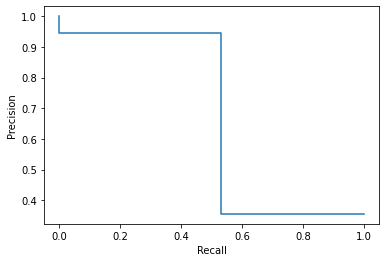

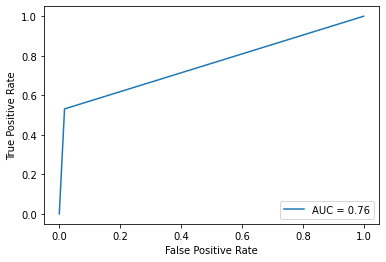

In [113]:
disp=plot_precision_recall_curve(y_valid, y_pred_logreg)
disp.plot()

disp=plot_roc_auc_curve(y_valid, y_pred_logreg)
disp.plot()

plt.show()

In [99]:
y_pred_util(logreg, le, X_valid, y_valid).tail()

predicted_proba  predicted_class  acutal_class
85         0.508750              2.0           2.0
86         0.237478              1.0           2.0
87         0.329048              1.0           1.0
88         0.455205              1.0           1.0
89         0.204747              1.0           1.0

### RFC

In [118]:
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
# parameter={'n_estimators': range(1,200,10),
#         'max_depth': range(1,20,2),
#            'min_samples_split': range(1,100,20),
#            'min_samples_leaf' : range(1,50,10),
#            'criteria' : 'entropy',
#            'bootsrap': True
#           }

parameter={'max_depth': range(1,20,2)}
rfc = RandomForestClassifier(warm_start=True, random_state=5)
rfc_cv = GridSearchCV(estimator=rfc, cv=cv, param_grid=parameter, 
                      verbose=2,scoring='roc_auc',
                      return_train_score=True,
                     n_jobs=8)
rfc_cv.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(random_state=5, warm_start=True),
             n_jobs=8, param_grid={'max_depth': range(1, 20, 2)},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [122]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)
#print(rfc_cv.cv_results_)
print(rfc_cv.n_features_in_)

{'max_depth': 9}
0.9163854003139719
27


In [129]:
#rfc_cv.cv_results_['param_max_depth'].data

array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], dtype=object)

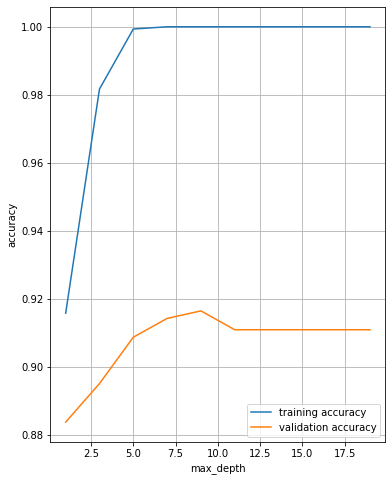

In [132]:
plot_cv_hyperparam_scores(rfc_cv.cv_results_, 'max_depth')

In [144]:
parameter={'n_estimators': range(1,200,10),
        'max_depth': [9],
           'min_samples_split': range(1,100,20),
           'min_samples_leaf' : range(1,50,10),
           'criterion' : ['gini', 'entropy']
          }

rfc = RandomForestClassifier(warm_start=True, random_state=5)
rfc_cv = GridSearchCV(estimator=rfc, cv=cv, param_grid=parameter, 
                      verbose=2,scoring='roc_auc',
                      return_train_score=True
                     )
rfc_cv.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41 
[CV] 

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV] 

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV] 

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV] 

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV] 

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[C

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[C

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=171, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=11 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=11, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=11 
[C

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_e

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_esti

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estima

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimator

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=91, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=171, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimato

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estima

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=21, min_samples_spl

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimato

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_es

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=8

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=31, min_samples_spl

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimato

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_e

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimato

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=131 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=171 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=171, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=1, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=8

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=41, min_samples_spl

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo


[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samp

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_sample

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=21, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=41, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_s

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=61, n_estimators=161, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=81, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=91, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=21, n_estimators=171, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=61, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=11, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, mi

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=21, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=11, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31,

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, mi

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=31, min_samples_split=81, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_sampl

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=51, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=61, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=71, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=81, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=91, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, m

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=101, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=111, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=121, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=131, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=141, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=151, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=161, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=171, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=181, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191 


/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/jmajumde/mypython3env/lib/python3.6/site-packages/joblib/parallel.py", line 765, in _dispatch
    jo

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=1, n_estimators=191, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=1, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, mi

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=21, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=21, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=61, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=101, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=141, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=41, n_estimators=181, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=61, n_estimators=191, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=31, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=41, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=71 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=71, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=81, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=111, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=121, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=151, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=161, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_sa

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=41, min_samples_split=81, n_estimators=191, total=   0.2s


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 13.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(random_state=5, warm_start=True),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [9],
                         'min_samples_leaf': range(1, 50, 10),
                         'min_samples_split': range(1, 100, 20),
                         'n_estimators': range(1, 200, 10)},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [146]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 11, 'min_samples_split': 61, 'n_estimators': 11}
0.9191424646781791


In [147]:
# create rfc with these hyperparameters
rfc = RandomForestClassifier(warm_start=True, random_state=5,
                            criterion='entropy', max_depth=9, min_samples_leaf=11,
                            min_samples_split=61, n_estimators=11)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=11,
                       min_samples_split=61, n_estimators=11, random_state=5,
                       warm_start=True)

In [148]:
rfc.feature_importances_

array([0.15369502, 0.        , 0.        , 0.        , 0.05398177,
       0.01876675, 0.01495377, 0.        , 0.06108843, 0.        ,
       0.05971888, 0.        , 0.        , 0.        , 0.        ,
       0.03208596, 0.0292432 , 0.11134631, 0.        , 0.00357356,
       0.17550619, 0.07745658, 0.02311305, 0.18547052, 0.        ,
       0.        , 0.        ])

In [152]:
y_pred_util(rfc, le, X_valid, y_valid).head()

predicted_proba  predicted_class  acutal_class
0         0.464816              1.0           1.0
1         0.220634              1.0           1.0
2         0.201546              1.0           1.0
3         0.263405              1.0           1.0
4         0.213191              1.0           1.0

In [154]:
y_pred_rfc=rfc.predict(X_valid)

In [164]:
print(metrics.roc_auc_score(y_valid, y_pred_rfc))
#metrics.precision_recall_curve(y_valid, y_pred_logreg)
print(metrics.recall_score(y_valid, y_pred_rfc))
print(metrics.accuracy_score(y_valid, y_pred_rfc))
print(metrics.precision_score(y_valid, y_pred_rfc))
print(metrics.classification_report(y_valid, y_pred_rfc))

0.7661637931034483
0.6875
0.7888888888888889
0.7096774193548387
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        58
           1       0.71      0.69      0.70        32

    accuracy                           0.79        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.79      0.79      0.79        90



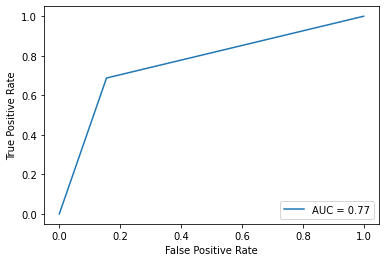

In [161]:
disp = plot_roc_auc_curve(y_valid, y_pred_rfc)
disp.plot()
plt.show()

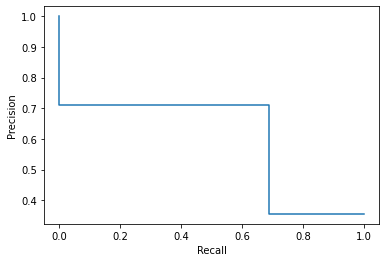

In [174]:
disp = plot_precision_recall_curve(y_valid, y_pred_rfc)
disp.plot()
plt.show()

In [149]:
import joblib


In [166]:
joblib.dump(rfc, filename="rfc.model.dat")

['rfc.model.dat']

In [176]:
rfc_load=joblib.load("rfc.model.dat")
print(rfc_load)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=11,
                       min_samples_split=61, n_estimators=11, random_state=5,
                       warm_start=True)


In [172]:
rfc_load.predict(X_valid[20:25])

array([0, 1, 1, 0, 1])

In [175]:
# upload to s3
import boto3
import os
import logging
from botocore.exceptions import ClientError
s3_client = boto3.client('s3')
bucket_name = "jm-ml-sagemaker01"
prefix="horse-colic"
model_filename="rfc.model.dat"
obj_key=os.path.join(prefix, model_filename)
try:
    s3_client.upload_file(model_filename, bucket_name, obj_key)
except ClientError as e:
    print(logging.error(e))
    raise e

### XGB